In [157]:
import pandas as pd
import numpy as np

url = '/content/drive/MyDrive/Data Mining/5/mushrooms.csv'
df = pd.read_csv(url)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [158]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    df_le = df.copy()
    encoders = {}
    for col in df_le.columns:
        le = LabelEncoder()
        df_le[col] = le.fit_transform(df_le[col])
        encoders[col] = le
    return df_le, encoders

df_le, encoders_le = label_encoding(df)

df_le.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [159]:
def onehot_encoding(df):
    df_oh = pd.get_dummies(df)
    return df_oh

df_oh = onehot_encoding(df)

df_oh.head()


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [160]:
def cat2vec_encoding(df, emb_dim=2):
    df_c2v = df.copy()
    cat2vec_maps = {}
    for col in df.columns:
        unique_vals = df[col].unique()
        rng = np.random.default_rng(seed=42)
        mapping = {val: rng.integers(0, 11, size=emb_dim) for val in unique_vals}
        cat2vec_maps[col] = mapping
        for d in range(emb_dim):
            new_col = col + '_emb' + str(d+1)
            df_c2v[new_col] = df_c2v[col].apply(lambda x: mapping[x][d])
        df_c2v.drop(columns=[col], inplace=True)
    return df_c2v, cat2vec_maps

df_c2v, cat2vec_maps = cat2vec_encoding(df)

df_c2v.head()


,class_emb1,class_emb2,cap-shape_emb1,cap-shape_emb2,cap-surface_emb1,cap-surface_emb2,cap-color_emb1,cap-color_emb2,bruises_emb1,bruises_emb2,...,ring-number_emb1,ring-number_emb2,ring-type_emb1,ring-type_emb2,spore-print-color_emb1,spore-print-color_emb2,population_emb1,population_emb2,habitat_emb1,habitat_emb2
0,0,8,0,8,0,8,0,8,0,8,...,0,8,0,8,0,8,0,8,0,8
1,7,4,0,8,0,8,7,4,0,8,...,0,8,0,8,7,4,7,4,7,4
2,7,4,7,4,0,8,4,9,0,8,...,0,8,0,8,7,4,7,4,4,9
3,0,8,0,8,7,4,4,9,0,8,...,0,8,0,8,0,8,0,8,0,8
4,7,4,0,8,0,8,0,7,7,4,...,0,8,7,4,7,4,4,9,7,4


In [161]:
class KModesCustom:
    def __init__(self, n_clusters, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.modes_ = None
        self.labels_ = None

    def _dissim(self, row, mode):
        return np.sum(row != mode)

    def _init_modes(self, X):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        modes = X[indices, :].copy()
        return modes

    def _update_modes(self, X, labels):
        new_modes = np.zeros((self.n_clusters, X.shape[1]), dtype=int)
        for k in range(self.n_clusters):
            cluster_data = X[labels == k]
            if cluster_data.shape[0] == 0:
                new_modes[k] = self.modes_[k]
            else:
                mode_k = []
                for col in range(X.shape[1]):
                    values, counts = np.unique(cluster_data[:, col], return_counts=True)
                    mode_value = values[np.argmax(counts)]
                    mode_k.append(mode_value)
                new_modes[k] = np.array(mode_k)
        return new_modes

    def fit(self, X):
        X = np.array(X)
        self.modes_ = self._init_modes(X)
        labels = np.zeros(X.shape[0], dtype=int)
        for it in range(self.max_iter):
            new_labels = np.zeros(X.shape[0], dtype=int)
            for i, row in enumerate(X):
                distances = np.array([self._dissim(row, mode) for mode in self.modes_]) # наш _dissim
                new_labels[i] = np.argmin(distances) # назначаем ближайший кластер
            if np.array_equal(labels, new_labels):
                print(f"Сходимость достигнута за {it} итераций")
                break
            labels = new_labels
            self.modes_ = self._update_modes(X, labels)
        self.labels_ = labels
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for row in X:
            distances = np.array([self._dissim(row, mode) for mode in self.modes_])
            predictions.append(np.argmin(distances))
        return np.array(predictions)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_


In [162]:
def map_clusters_to_labels(true_labels, clusters):
    mapped = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        indices = np.where(clusters == cluster)
        majority_label = np.bincount(true_labels[indices]).argmax()
        mapped[indices] = majority_label
    return mapped


In [163]:
from sklearn.metrics import confusion_matrix, roc_auc_score

def evaluate_clustering(true_labels, cluster_labels):
    pred_labels = map_clusters_to_labels(true_labels, cluster_labels)
    cm = confusion_matrix(true_labels, pred_labels)
    print("Матрица ошибок:")
    print(cm)


    TP = cm[1, 1] # TP (True Positive) - правильно классифицированные положительные примеры
    FN = cm[1, 0] # FN (False Negative) - положительные примеры, ошибочно классифицированные как отрицательные
    TN = cm[0, 0] # TN (True Negative) - правильно классифицированные отрицательные примеры
    FP = cm[0, 1] # FP (False Positive) - отрицательные примеры, ошибочно классифицированные как положительные
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # Показывает, какая доля положительных примеров была правильно идентифицирована
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Показывает, какая доля отрицательных примеров была правильно идентифицирована
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")


    roc_auc = roc_auc_score(true_labels, pred_labels)
    print(f"ROC-AUC: {roc_auc:.4f}")



Сходимость достигнута за 4 итераций
Распределение кластеров (Label Encoding):
0    5022
1    3102
Name: count, dtype: int64

Оценка качества (Label Encoding):
Матрица ошибок:
[[4206    2]
 [ 816 3100]]
Sensitivity: 0.7916
Specificity: 0.9995
ROC-AUC: 0.8956


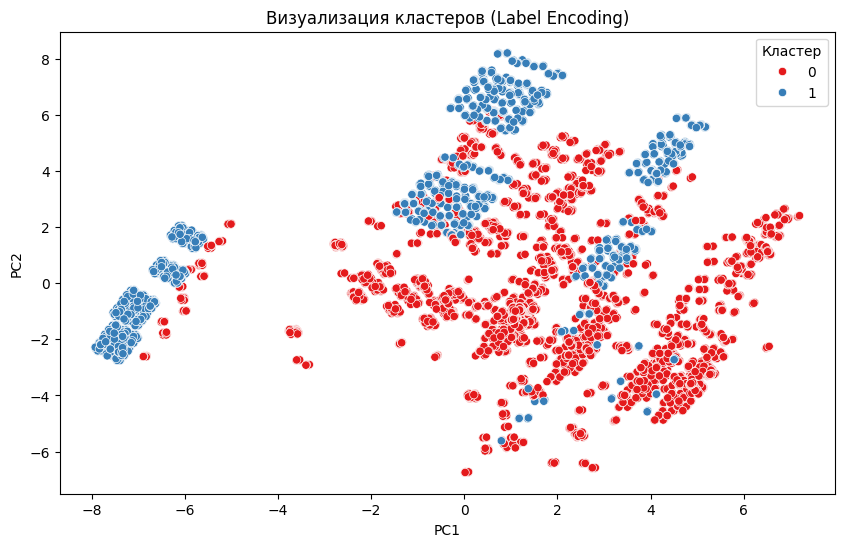

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


true_labels_le = label_encoding(df)[0]['class'].values
df_le = label_encoding(df)[0]
X_le = df_le.values

n_clusters = 2
kmodes_le = KModesCustom(n_clusters=n_clusters, max_iter=50, random_state=42)
labels_le = kmodes_le.fit_predict(X_le)

print("Распределение кластеров (Label Encoding):")
print(pd.Series(labels_le).value_counts())

print("\nОценка качества (Label Encoding):")
evaluate_clustering(true_labels_le, labels_le)

df_le['Cluster'] = labels_le

pca_le = PCA(n_components=2)
components_le = pca_le.fit_transform(df_le.drop(columns=['Cluster']).values)

vis_df_le = pd.DataFrame(data=components_le, columns=['PC1', 'PC2'])
vis_df_le['Cluster'] = labels_le

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster',
                palette='Set1', data=vis_df_le)
plt.title('Визуализация кластеров (Label Encoding)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Кластер")
plt.show()


Сходимость достигнута за 3 итераций
Распределение кластеров (One-Hot Encoding):
0    5000
1    3124
Name: count, dtype: int64

Оценка качества (One-Hot Encoding):
Матрица ошибок:
[[4184   24]
 [ 816 3100]]
Sensitivity: 0.7916
Specificity: 0.9943
ROC-AUC: 0.8930


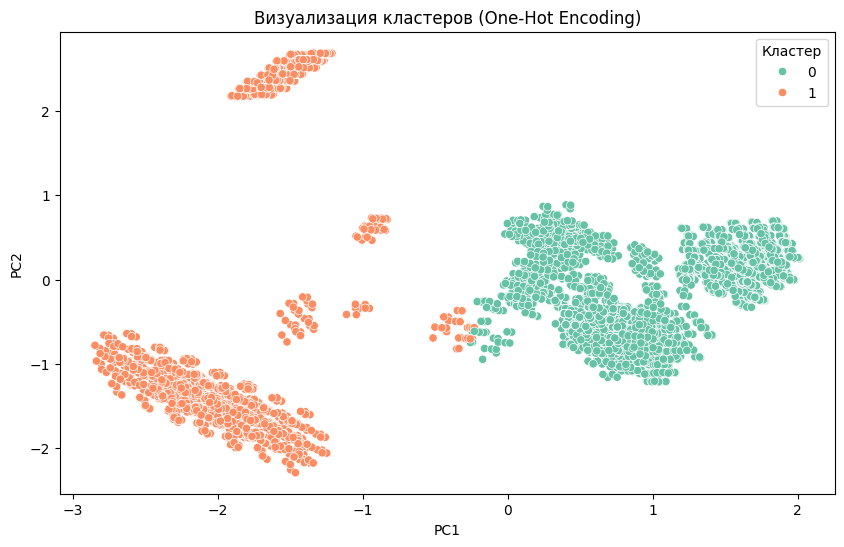

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


def onehot_encoding(df):
    df_oh = pd.get_dummies(df)
    return df_oh

df_oh = onehot_encoding(df)


true_labels_oh = label_encoding(df)[0]['class'].values


X_oh = df_oh.values

n_clusters = 2
kmodes_oh = KModesCustom(n_clusters=n_clusters, max_iter=50, random_state=42)
labels_oh = kmodes_oh.fit_predict(X_oh)


print("Распределение кластеров (One-Hot Encoding):")
print(pd.Series(labels_oh).value_counts())


print("\nОценка качества (One-Hot Encoding):")
evaluate_clustering(true_labels_oh, labels_oh)


df_oh_vis = df_oh.copy()
df_oh_vis['Cluster'] = labels_oh

pca_oh = PCA(n_components=2)
components_oh = pca_oh.fit_transform(df_oh_vis.drop(columns=['Cluster']).values)

vis_df_oh = pd.DataFrame(data=components_oh, columns=['PC1', 'PC2'])
vis_df_oh['Cluster'] = labels_oh


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster',
                palette='Set2', data=vis_df_oh)
plt.title('Визуализация кластеров (One-Hot Encoding)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Кластер")
plt.show()


Сходимость достигнута за 3 итераций
Распределение кластеров (Cat2Vec):
0    5120
1    3004
Name: count, dtype: int64

Оценка качества (Cat2Vec):
Матрица ошибок:
[[4184   24]
 [ 936 2980]]
Sensitivity: 0.7610
Specificity: 0.9943
ROC-AUC: 0.8776


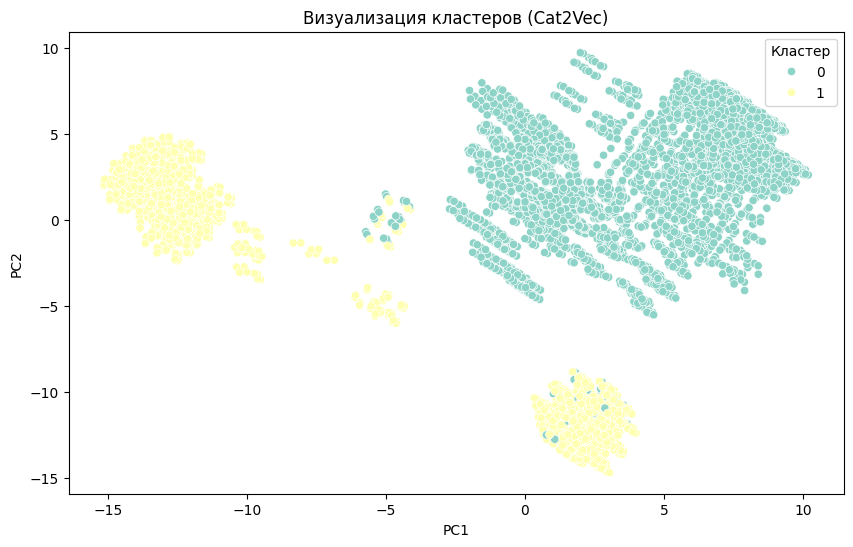

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

X_c2v = df_c2v.values


df_class_encoded, _ = label_encoding(df[['class']])
true_labels_c2v = df_class_encoded['class'].values

kmodes_c2v = KModesCustom(n_clusters=2, max_iter=50, random_state=42)
labels_c2v = kmodes_c2v.fit_predict(X_c2v)

print("Распределение кластеров (Cat2Vec):")
print(pd.Series(labels_c2v).value_counts())

print("\nОценка качества (Cat2Vec):")
evaluate_clustering(true_labels_c2v, labels_c2v)

df_c2v_vis = df_c2v.copy()
df_c2v_vis['Cluster'] = labels_c2v

pca_c2v = PCA(n_components=2)
components_c2v = pca_c2v.fit_transform(df_c2v_vis.drop(columns=['Cluster']).values)

vis_df_c2v = pd.DataFrame(data=components_c2v, columns=['PC1', 'PC2'])
vis_df_c2v['Cluster'] = labels_c2v

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster',
                palette='Set3', data=vis_df_c2v)
plt.title('Визуализация кластеров (Cat2Vec)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Кластер")
plt.show()
